In [23]:
import pandas as pd
import statsmodels as sm
import numpy as np

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
df = pd.read_csv('china.csv')
df = df.iloc[:41]

In [109]:
#take natural log of variables to interpret first differences as growth rates
df['lnCO2'] = np.log(df['x5'])
df['lnEn'] = np.log(df['x11'])
df['lnGDP'] = np.log(df['l_y2'])

In [110]:
Y = df[['temp', 'lnGDP', 'lnCO2', 'lnEn']]

In [127]:
df['lnx1'] = np.log(df['x1'])
df['lnx2'] = np.log(df['x2'])
df['lnTr'] = np.log(df['x3'])
df['lnMC'] = np.log(df['x6'])
X = df[['lnx1', 'lnx2', 'lnTr', 'lnMC']]

In [128]:
X

,lnx1,lnx2,lnTr,lnMC
0,-3.533587,-0.342490,1.898140,3.876489
1,-3.074775,0.000000,1.856684,3.872275
2,-3.015935,0.048790,1.831741,3.889690
3,-2.813411,0.104360,1.809968,3.894943
4,-2.453408,0.431782,1.771052,3.857955
5,-2.095571,0.923862,1.790823,3.820913
6,-2.112792,0.943127,1.757094,3.785785
7,-1.861753,1.174338,1.772576,3.757400
8,-1.691733,1.371688,1.782226,3.767946
9,-1.532477,1.344430,1.791562,3.771634


Check the stationarity of time series. If the series are I(0), VAR in levels can be applied. If the variables are I(1), do the Johansen cointegration test. If the variables are cointegrated, apply VECM, otherwise VAR in first differencies.

ADF test. H0: unit root (time series is non-stationary)

In [111]:
sm.tsa.stattools.adfuller(Y['temp'])

(-2.9633186134453355,
 0.038464892665927085,
 0,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 16.978891748484095)

In [112]:
sm.tsa.stattools.adfuller(Y['temp'].diff()[1:])

(-7.4498266229751735,
 5.70941515984933e-11,
 1,
 38,
 {'1%': -3.6155091011809297,
  '5%': -2.941262357486514,
  '10%': -2.6091995013850418},
 20.675750514837524)

In [113]:
sm.tsa.stattools.adfuller(Y['lnGDP'])

(1.4804914411049455,
 0.9974508105535311,
 7,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 -142.83708583894082)

In [114]:
sm.tsa.stattools.adfuller(Y['lnGDP'].diff()[1:])

(-1.1553197306808138,
 0.692514892288957,
 10,
 29,
 {'1%': -3.6790595944893187,
  '5%': -2.9678817237279103,
  '10%': -2.6231583472057074},
 -141.8047891630285)

In [115]:
sm.tsa.stattools.adfuller(Y['lnCO2'])

(-0.19565558575634273,
 0.9390374826855308,
 2,
 38,
 {'1%': -3.6155091011809297,
  '5%': -2.941262357486514,
  '10%': -2.6091995013850418},
 -118.58965504029544)

In [116]:
sm.tsa.stattools.adfuller(Y['lnCO2'].diff()[1:])

(-2.9938190199900667,
 0.03547567176941428,
 1,
 38,
 {'1%': -3.6155091011809297,
  '5%': -2.941262357486514,
  '10%': -2.6091995013850418},
 -115.43963763428007)

In [117]:
sm.tsa.stattools.adfuller(Y['lnEn'])

(1.1869806584179634,
 0.9958946859003495,
 1,
 39,
 {'1%': -3.610399601308181,
  '5%': -2.939108945868946,
  '10%': -2.6080629651545038},
 -127.27685936658628)

In [118]:
sm.tsa.stattools.adfuller(Y['lnEn'].diff()[1:])

(-3.8185801996359108,
 0.002722834566501431,
 0,
 39,
 {'1%': -3.610399601308181,
  '5%': -2.939108945868946,
  '10%': -2.6080629651545038},
 -123.91786648219849)

In [119]:
sm.tsa.vector_ar.vecm.coint_johansen(X, det_order=0, k_ar_diff=2).lr1#Trace statistic for Johansen Cointegration test
#H0: r=0; H0: r=1; H0: r=2; H0: r=3

array([50.16575693, 24.45549914, 10.29779213,  0.9542968 ])

In [120]:
sm.tsa.vector_ar.vecm.coint_johansen(Y, det_order=0, k_ar_diff=2).cvt

array([[44.4929, 47.8545, 54.6815],
       [27.0669, 29.7961, 35.4628],
       [13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

Given the critical values for each of the trace statistics, cointegrsting rank (r) equals 1 (second row in the matrix above)

In [129]:
vecm = sm.tsa.vector_ar.vecm.VECM(Y, exog=X, k_ar_diff=1, coint_rank=1, deterministic='ci')

In [130]:
vecm_fit = vecm.fit()

In [133]:
vecm_fit.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
exog1,-0.2544,0.358,-0.710,0.478,-0.957,0.448
exog2,0.3323,0.325,1.022,0.307,-0.305,0.969
exog3,-0.3863,0.410,-0.942,0.346,-1.190,0.417
exog4,0.4789,0.804,0.596,0.551,-1.097,2.055
L1.temp,-0.2435,0.161,-1.514,0.130,-0.559,0.072
L1.lnGDP,-2.4967,1.670,-1.495,0.135,-5.770,0.777
L1.lnCO2,0.2569,1.913,0.134,0.893,-3.493,4.007
L1.lnEn,-1.3423,2.884,-0.465,0.642,-6.996,4.311
,coef,std err,z,P>|z|,[0.025,0.975]
exog1,-0.0082,0.030,-0.275,0.783,-0.067,0.050


In [134]:
irf = vecm_fit.irf(20)

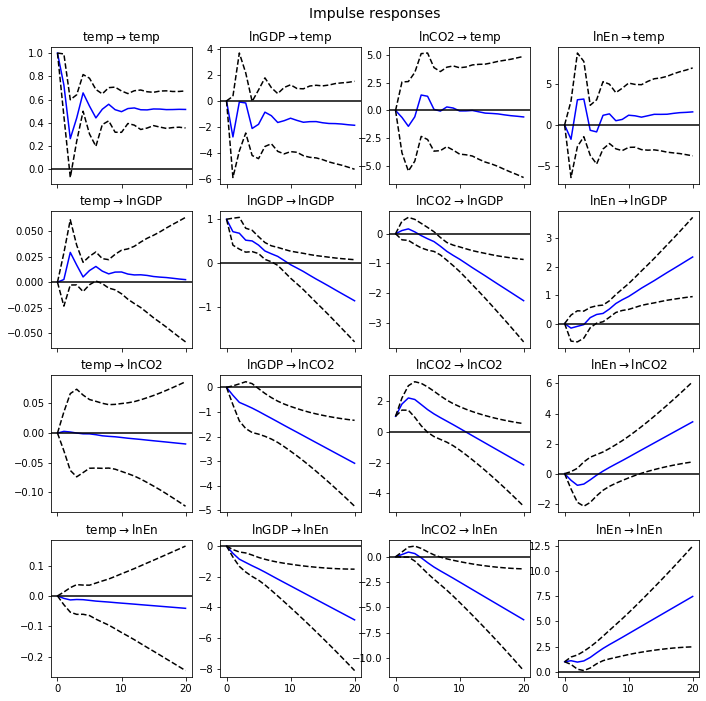

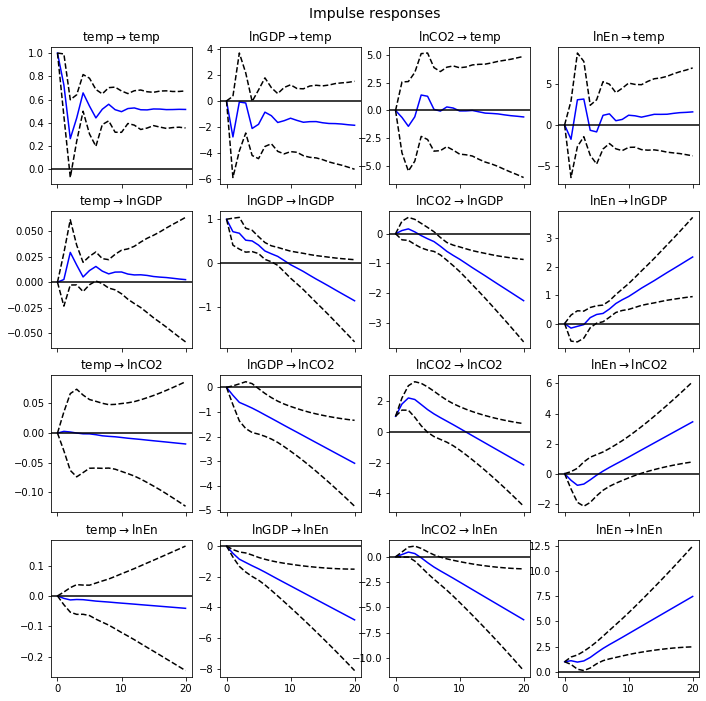

In [107]:
irf.plot(orth=False)